___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

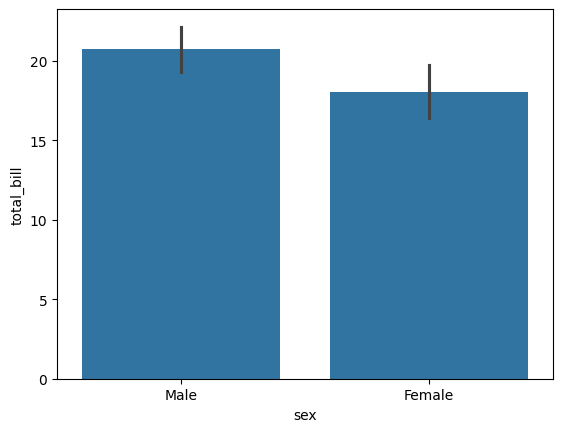

In [3]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [4]:
import numpy as np

You can change the estimator object to your own function, that converts a vector to a scalar:

In [8]:
tips.groupby('sex')['total_bill'].mean()

C:\Users\964864\AppData\Local\Temp\1\ipykernel_32248\3460004670.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['total_bill'].mean()


sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [9]:
tips.groupby('sex')['total_bill'].std()

C:\Users\964864\AppData\Local\Temp\1\ipykernel_32248\2539056382.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')['total_bill'].std()


sex
Male      9.246469
Female    8.009209
Name: total_bill, dtype: float64

<Axes: xlabel='sex', ylabel='total_bill'>

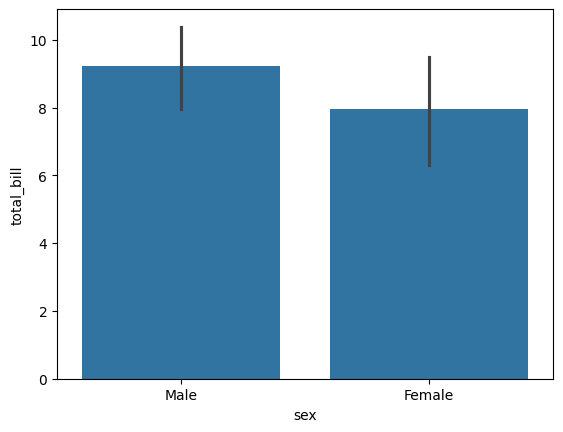

In [5]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) # Plot standard deviations instead of means

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<Axes: xlabel='sex', ylabel='count'>

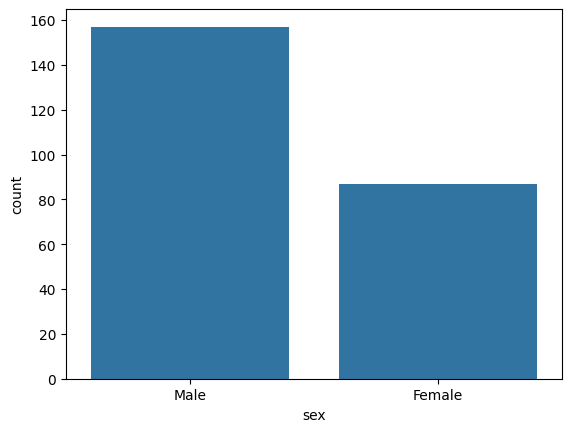

In [10]:
sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

C:\Users\964864\AppData\Local\Temp\1\ipykernel_32248\3391461266.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

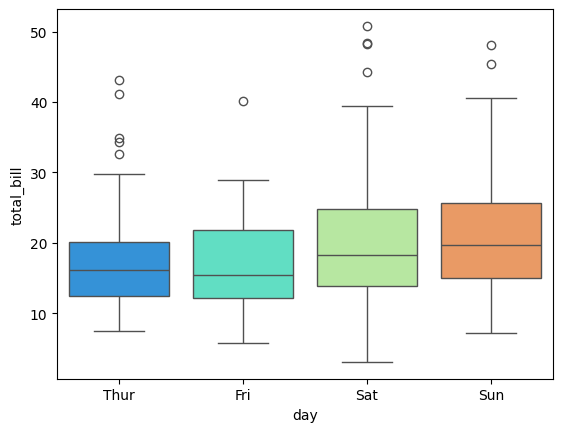

In [21]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')

C:\Users\964864\AppData\Local\Temp\1\ipykernel_32248\2915923028.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="total_bill", y="day", data=tips, palette='rainbow')


<Axes: xlabel='total_bill', ylabel='day'>

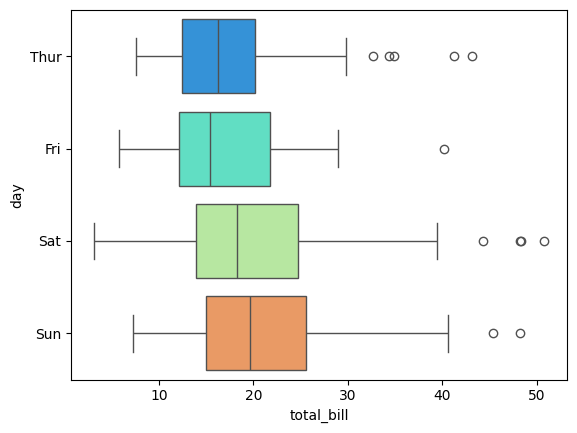

In [22]:
sns.boxplot(x="total_bill", y="day", data=tips, palette='rainbow') # I added this horizontally

<Axes: >

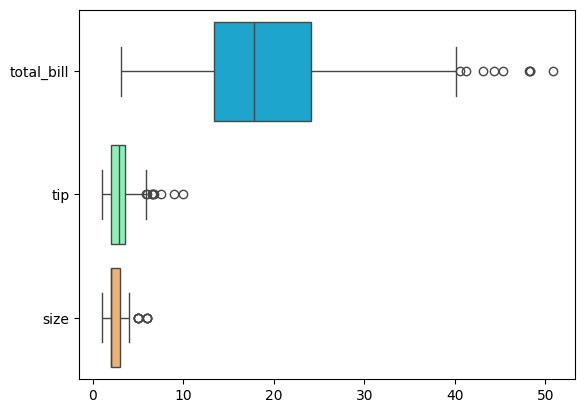

In [14]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

<Axes: xlabel='day', ylabel='total_bill'>

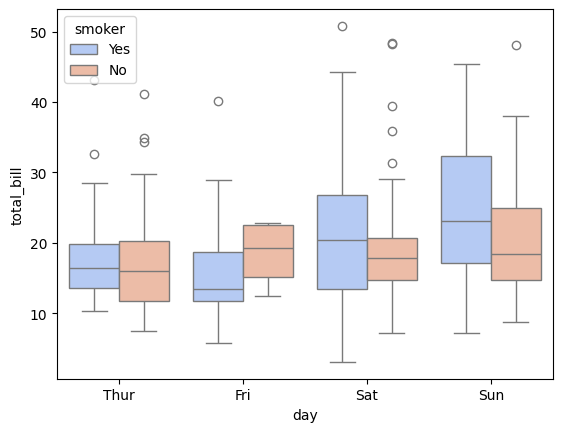

In [15]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm") # compare total bill across days and smoking status

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

C:\Users\964864\AppData\Local\Temp\1\ipykernel_32248\2751363601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')


<Axes: xlabel='day', ylabel='total_bill'>

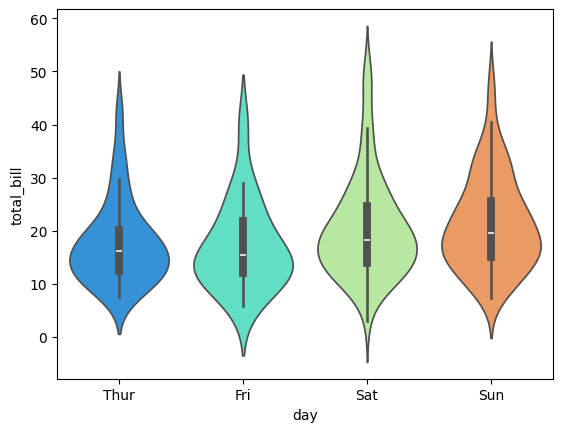

In [16]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

<Axes: xlabel='day', ylabel='total_bill'>

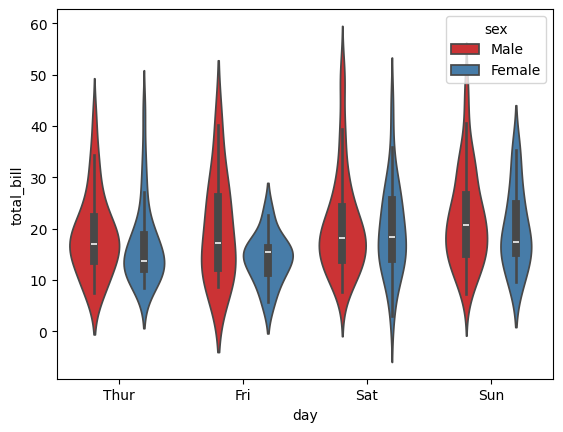

In [17]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

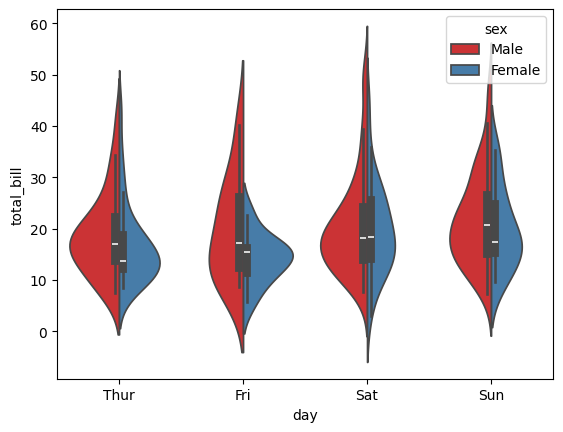

In [18]:
# instead of having separate violins for each sub-category (sex), have them form the two sides of the same violin 
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1') 

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<Axes: xlabel='day', ylabel='total_bill'>

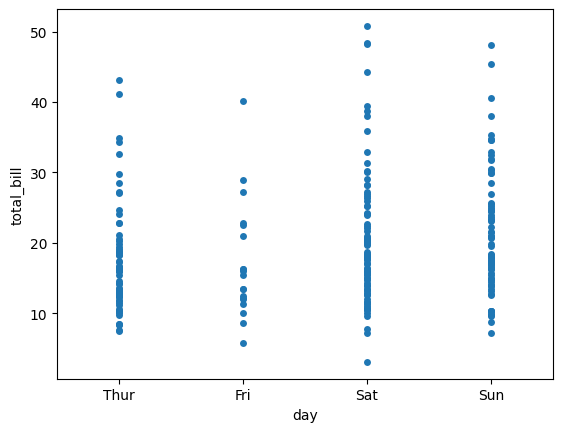

In [36]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=False) # In past, jitter=False was default

<Axes: xlabel='day', ylabel='total_bill'>

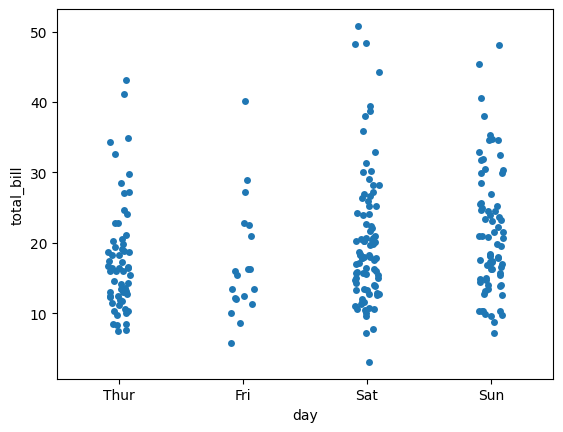

In [24]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True) # Without jitter = true, it is hard to tell how many points are at any given level

<Axes: xlabel='day', ylabel='total_bill'>

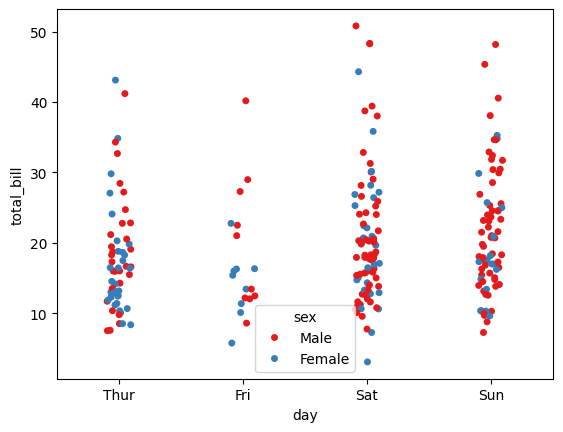

In [25]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

<Axes: xlabel='day', ylabel='total_bill'>

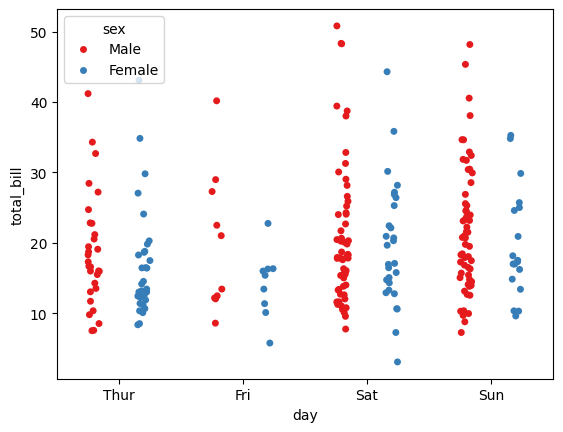

In [28]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1', dodge=True) # now using dodge instead of split

<Axes: xlabel='day', ylabel='total_bill'>

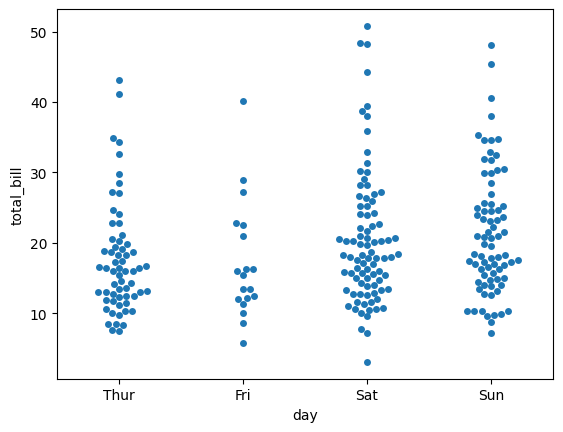

In [29]:
# Automatically moves excess points to sides 
# This is computationally expensive, so do not use this for large datasets
sns.swarmplot(x="day", y="total_bill", data=tips) 

<Axes: xlabel='day', ylabel='total_bill'>

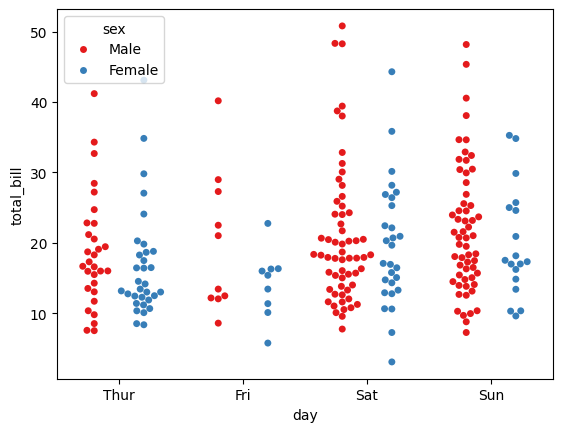

In [31]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True) # Replaced split with dodge

### Combining Categorical Plots

C:\Users\964864\AppData\Local\Temp\1\ipykernel_32248\734697897.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')


<Axes: xlabel='tip', ylabel='day'>

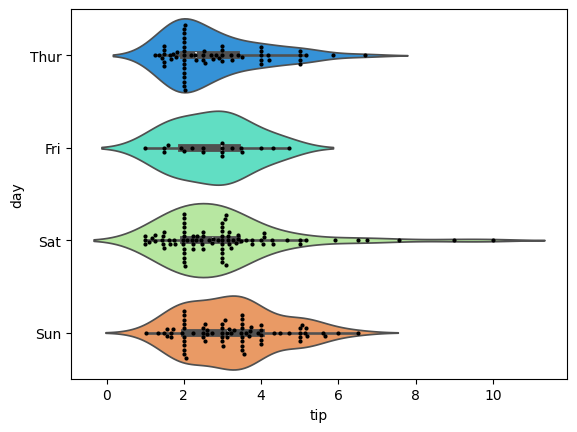

In [32]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## factorplot

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

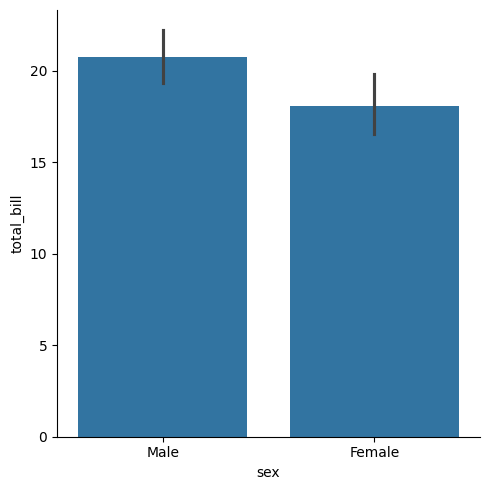

In [34]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar') # Renamed catplot

# Great Job!